In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [3]:
data =pd.read_excel('/content/drive/MyDrive/News/Our/Dataset.xlsx')
data.head()

,headlines,category,time
0,আ.লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্য...,politics,২৪ ডিসেম্বর ২০২২
1,"আবারও শেখ হাসিনা আওয়ামী লীগের সভাপতি, ওবায়দুল ...",politics,২৪ ডিসেম্বর ২০২২
2,আওয়ামী লীগের সম্মেলনের দ্বিতীয় অধিবেশন চলছে,politics,২৪ ডিসেম্বর ২০২২
3,ক্ষমতার মঞ্চে শেখ হাসিনার বিকল্প নেই: ওবায়দুল ...,politics,২৪ ডিসেম্বর ২০২২
4,আওয়ামী লীগকে জনগণের প্রতিষ্ঠানে পরিণত করেন বঙ্...,politics,২৪ ডিসেম্বর ২০২২


In [4]:
data.groupby('category').size().reset_index(name='counts')

,category,counts
0,coronavirus,2111
1,economics,1823
2,entertainment,2036
3,international,2037
4,politics,2000
5,sports,2015
6,technology,2028


In [5]:
data['category'].replace([0,1,2,3,4,5,6],['politics','International','economics','sports','entertainment','technology','coronavirus'],inplace=True)

In [6]:
data.groupby('category').size().reset_index(name='counts')

,category,counts
0,coronavirus,2111
1,economics,1823
2,entertainment,2036
3,international,2037
4,politics,2000
5,sports,2015
6,technology,2028


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14050 entries, 0 to 14049
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  14050 non-null  object
 1   category   14050 non-null  object
 2   time       14050 non-null  object
dtypes: object(3)
memory usage: 329.4+ KB


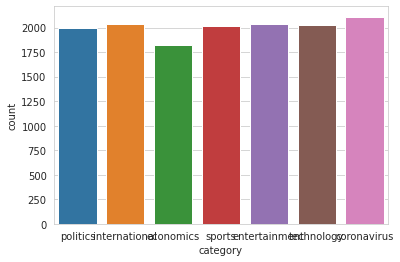

In [8]:
sns.set_style('whitegrid')
sns.countplot(x = 'category', data = data)

In [9]:
def process_sentences(Sentence): 
    Sentence = re.sub('[^\u0980-\u09FF]',' ',Sentence)
    Sentence = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', Sentence)
    Sentence = re.sub(r'(\W)(?=\1)', '', Sentence)
    Sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', Sentence, flags=re.MULTILINE)
    Sentence = re.sub(r'\<a href', ' ', Sentence)
    Sentence = re.sub(r'&amp;', '', Sentence) 
    Sentence = re.sub(r'<br />', ' ', Sentence)
    Sentence = re.sub(r'\'', ' ', Sentence)
    Sentence = re.sub(r'ߑͰߑ̰ߒנ', '', Sentence)
    Sentence = re.sub(r'ߎɰߎɰߎɍ', '', Sentence)
    return Sentence

In [10]:
data['headlines'] = data['headlines'].apply(process_sentences)  
data

,headlines,category,time
0,আ লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্য...,politics,২৪ ডিসেম্বর ২০২২
1,আবারও শেখ হাসিনা আওয়ামী লীগের সভাপতি ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২
2,আওয়ামী লীগের সম্মেলনের দ্বিতীয় অধিবেশন চলছে,politics,২৪ ডিসেম্বর ২০২২
3,ক্ষমতার মঞ্চে শেখ হাসিনার বিকল্প নেই ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২
4,আওয়ামী লীগকে জনগণের প্রতিষ্ঠানে পরিণত করেন বঙ্...,politics,২৪ ডিসেম্বর ২০২২
...,...,...,...
14045,অত্যাধুনিক প্রযুক্তির ফ্ল্যাগশিপ ফোন আনলো ওয়ালটন,technology,১৮ জানুয়ারি ২০২২
14046,মেগাপিক্সেল ক্যামেরার স্মার্টফোন আনছে মটোরোলা,technology,১৮ জানুয়ারি ২০২২
14047,অ্যাপল ও গুগলের বিরুদ্ধে মামলা পাবজি নির্মাতার,technology,১৮ জানুয়ারি ২০২২
14048,শিক্ষার্থীদের অনলাইন পড়ালেখা সহজ করবে প্যাড ট...,technology,১৭ জানুয়ারি ২০২২


In [11]:
# Remove the Text with least words
data['length'] = data['headlines'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 14050


In [12]:
dataset

,headlines,category,time,length
0,আ লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্য...,politics,২৪ ডিসেম্বর ২০২২,8
1,আবারও শেখ হাসিনা আওয়ামী লীগের সভাপতি ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২,10
2,আওয়ামী লীগের সম্মেলনের দ্বিতীয় অধিবেশন চলছে,politics,২৪ ডিসেম্বর ২০২২,6
3,ক্ষমতার মঞ্চে শেখ হাসিনার বিকল্প নেই ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২,8
4,আওয়ামী লীগকে জনগণের প্রতিষ্ঠানে পরিণত করেন বঙ্...,politics,২৪ ডিসেম্বর ২০২২,9
...,...,...,...,...
14045,অত্যাধুনিক প্রযুক্তির ফ্ল্যাগশিপ ফোন আনলো ওয়ালটন,technology,১৮ জানুয়ারি ২০২২,6
14046,মেগাপিক্সেল ক্যামেরার স্মার্টফোন আনছে মটোরোলা,technology,১৮ জানুয়ারি ২০২২,5
14047,অ্যাপল ও গুগলের বিরুদ্ধে মামলা পাবজি নির্মাতার,technology,১৮ জানুয়ারি ২০২২,7
14048,শিক্ষার্থীদের অনলাইন পড়ালেখা সহজ করবে প্যাড ট...,technology,১৭ জানুয়ারি ২০২২,7


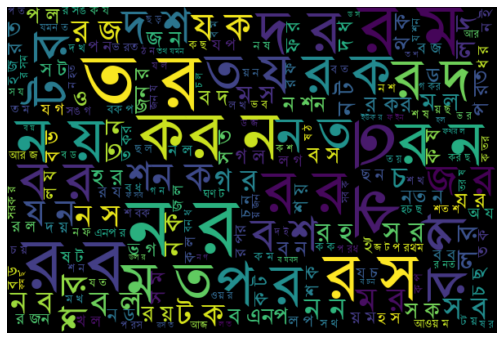

In [13]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in data['headlines']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/News/Our/Nikosh/Nikosh.ttf', width =600, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10,6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [14]:
def data_summary(dataset):
    
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.headlines) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].headlines) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.category==label].headlines)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].headlines))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  coronavirus
Number of Documents:2111
Number of Words:12999
Number of Unique Words:1492
Most Frequent Words:

মৃত্যু	768
শনাক্ত	732
করোনায়	634
করোনা	592
জনের	433
বিভাগে	347
শনাক্তের	211
ঘণ্টায়	193
হার	189
নেই	162

Class Name :  international
Number of Documents:2037
Number of Words:12698
Number of Unique Words:3449
Most Frequent Words:

নিহত	200
থেকে	82
ও	70
রাশিয়া	67
হামলা	64
রুশ	63
সঙ্গে	62
নতুন	59
যুক্তরাষ্ট্র	56
রাশিয়ার	55

Class Name :  entertainment
Number of Documents:2036
Number of Words:11938
Number of Unique Words:3134
Most Frequent Words:

নিয়ে	128
না	107
শাকিব	72
নতুন	70
সঙ্গে	68
র	65
বললেন	53
পর	52
থেকে	49
এবার	46

Class Name :  technology
Number of Documents:2028
Number of Words:13387
Number of Unique Words:3333
Most Frequent Words:

নতুন	130
ই	96
না	90
মোবাইল	90
যেভাবে	87
হবে	83
ফেসবুক	83
পলক	75
ও	73
থেকে	69

Class Name :  sports
Number of Documents:2015
Number of Words:11485
Number of Unique Words:2316
Most Frequent Words:

বিশ্বকাপ	128
আর্জেন্টিনা	114
থেক

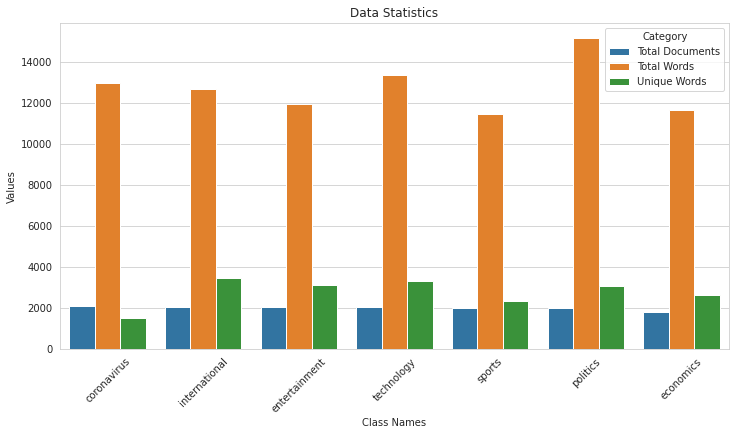

In [15]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

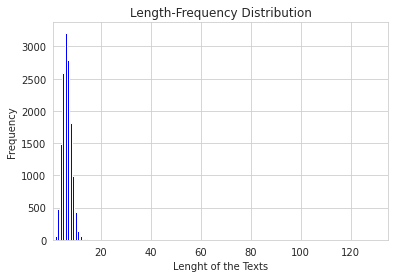

Maximum Length of a Text: 15
Minimum Length of a Text: 1
Average Length of a Text: 6.0


In [16]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.headlines.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [17]:
# Label Encoding Function
                                       
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def label_encoding(sentiment,bool):
  
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [18]:
# Dataset Splitting Function

def dataset_split(feature_space,category):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,category,
                                                  test_size = 0.20,random_state =22,stratify=category)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test


In [19]:
def calc_gram_tfidf(headlines,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headlines)
    
    return tfidf,X

In [20]:
# Unigram Tf-idf value calculation
          

def calc_unigram_tfidf(headlines):
    tfidf = TfidfVectorizer(use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headlines)
    
    return tfidf,X



In [21]:
# Bi-gram Tf-idf value calculation


def calc_bigram_tfidf(headlines):
    tfidf = TfidfVectorizer(ngram_range=(1,2),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headlines)
    
    return tfidf,X




In [22]:
# Tri-gram Tf-idf value calculation

def calc_trigram_tfidf(headlines):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(headlines)
    
    return tfidf,X

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [24]:
def model_defination():
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [25]:
def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [26]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [27]:
path = "/content/drive/MyDrive/News/Our/json/"

In [28]:
import json
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.headlines,gram)
    labels = label_encoding(dataset.category,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = model_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    with open(path+f'ml_performance_2_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 12421

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 14050 
	Training		 11240 
	Test			 2810


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 47644

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 14050 
	Training		 11240 
	Test			 2810


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Feature Size :======> 81220

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 14050 
	Training		 11240 
	Test			 2810


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py:504: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [29]:
accuracy1 = json.load(open('/content/drive/MyDrive/News/Our/json/ml_performance_2_Unigram.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,91.67,91.67,91.67,91.67
DT,19.64,19.64,19.64,19.64
RF,90.39,90.39,90.39,90.39
MNB,91.78,91.78,91.78,91.78
KNN,74.20,74.20,74.20,74.20
Linear SVM,86.12,86.12,86.12,86.12
RBF SVM,88.83,88.83,88.83,88.83
SGD,90.82,90.82,90.82,90.82


In [30]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by MNB at = 91.78
Highest F1-Score achieved by MNB at = 91.78
Highest Precision Score achieved by MNB at = 91.78
Highest Recall Score achieved by MNB at = 91.78


In [31]:
accuracy2 = json.load(open('/content/drive/MyDrive/News/Our/json/ml_performance_2_Bigram.json'))
table2 = performance_table(accuracy2)
table2

,Accuracy,Precision,Recall,F1 Score
LR,92.35,92.35,92.35,92.35
DT,19.57,19.57,19.57,19.57
RF,90.21,90.21,90.21,90.21
MNB,93.35,93.35,93.35,93.35
KNN,74.13,74.13,74.13,74.13
Linear SVM,83.95,83.95,83.95,83.95
RBF SVM,88.61,88.61,88.61,88.61
SGD,91.03,91.03,91.03,91.03


In [32]:
print(f"Highest Accuracy achieved by {table2.Accuracy.idxmax(axis = 0)} at = {max(table2.Accuracy)}")
print(f"Highest F1-Score achieved by {table2['F1 Score'].idxmax(axis = 0)} at = {max(table2['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table2['Precision'].idxmax(axis = 0)} at = {max(table2['Precision'] )}")
print(f"Highest Recall Score achieved by {table2['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by MNB at = 93.35
Highest F1-Score achieved by MNB at = 93.35
Highest Precision Score achieved by MNB at = 93.35
Highest Recall Score achieved by MNB at = 91.78


In [33]:
accuracy3 = json.load(open('/content/drive/MyDrive/News/Our/json/ml_performance_2_Trigram.json'))
table3 = performance_table(accuracy3)
table3

,Accuracy,Precision,Recall,F1 Score
LR,92.28,92.28,92.28,92.28
DT,19.57,19.57,19.57,19.57
RF,89.86,89.86,89.86,89.86
MNB,93.45,93.45,93.45,93.45
KNN,74.45,74.45,74.45,74.45
Linear SVM,82.17,82.17,82.17,82.17
RBF SVM,88.08,88.08,88.08,88.08
SGD,91.64,91.64,91.64,91.64


In [34]:
print(f"Highest Accuracy achieved by {table3.Accuracy.idxmax(axis = 0)} at = {max(table3.Accuracy)}")
print(f"Highest F1-Score achieved by {table3['F1 Score'].idxmax(axis = 0)} at = {max(table3['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table3['Precision'].idxmax(axis = 0)} at = {max(table3['Precision'] )}")
print(f"Highest Recall Score achieved by {table3['Recall'].idxmax(axis = 0)} at = {max(table3['Recall'] )}")

Highest Accuracy achieved by MNB at = 93.45
Highest F1-Score achieved by MNB at = 93.45
Highest Precision Score achieved by MNB at = 93.45
Highest Recall Score achieved by MNB at = 93.45


# **Final Algorithm**



*   Final N-gram: Tri-gram
*   Final Model: Multinomial Naive Bayes(MNB)





In [35]:
# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(dataset.headlines)

# Encode the labels
lables = label_encoding(dataset.category,False)

# Split the Feature into train and test set
X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,category=lables)

Feature Size :======> 81220

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 14050 
	Training		 11240 
	Test			 2810


In [36]:
classifier1 = MultinomialNB(alpha=0.431)
classifier1.fit(X_train, y_train)
y_pred = classifier1.predict(X_test)

In [37]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 99.89%
Test Accuracy is : 93.45%


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       422
           1       0.94      0.88      0.91       365
           2       0.93      0.91      0.92       407
           3       0.92      0.90      0.91       407
           4       0.96      0.97      0.96       400
           5       0.94      0.96      0.95       403
           6       0.90      0.93      0.91       406

    accuracy                           0.93      2810
   macro avg       0.93      0.93      0.93      2810
weighted avg       0.93      0.93      0.93      2810



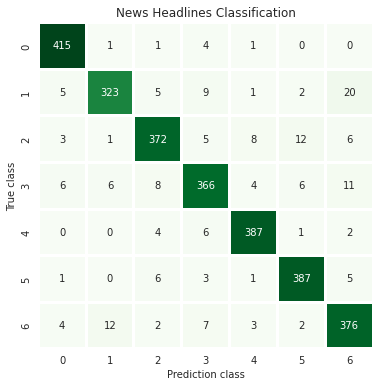

In [39]:
conf_mat = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (6,6))
sns.heatmap(conf_mat, annot = True,cmap='Greens',cbar=False,linewidth=2,fmt='d')
plt.title('News Headlines Classification')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

In [40]:
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


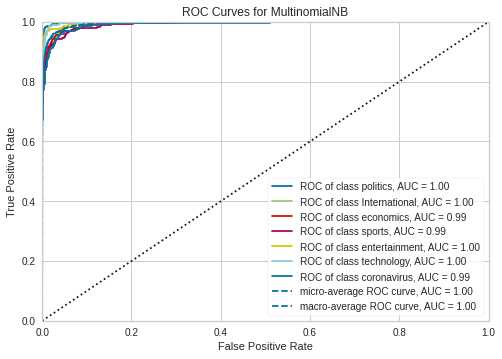

In [41]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(classifier1, classes=['politics','International','economics','sports','entertainment','technology','coronavirus'])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   